# Tutorial - Chapter 4 Classification (Example 2: Mushrooom)

### Mushroom Classification Using Different Classifiers 

In this project, I will examine the data and create a machine learning algorithm that will detect if the mushroom is edible or poisonous by its specifications like cap shape, cap color, gill color, etc. using different classifiers.

We will try to classify these mushrooms as poisonous or edible using 

- **Logistic regression**
- **Linear discriminant analysis (LQA)**
- **Quadratic discriminant analysis (QDA)**
- **KNN Classification (KNN)**
- **Naive Bayes Classification (NB)**

The dataset used in this project is "mushrooms.csv" which contains 8124 instances of mushrooms with 23 features like cap-shape, cap-surface, cap-color, bruises, odor, etc. and is made available by UCI Machine Learning.

## 1. Import libraries

In [1]:
# Importing necessary libraries for data analysis, visualization, and machine learning
import numpy as np  # Numerical operations library
import pandas as pd  # Data manipulation and analysis library
import seaborn as sns  # Statistical data visualization library
import matplotlib.pyplot as plt  # Plotting library
import os  # Operating system module

# Importing scikit-learn modules for machine learning tasks
from sklearn.model_selection import train_test_split  # Splitting data into training and testing sets
from sklearn.metrics import classification_report, confusion_matrix  # Evaluation metrics for classification models
from sklearn.preprocessing import LabelEncoder  # Encoding categorical variables
from sklearn.model_selection import cross_val_score  # Cross-validation for model evaluation
from sklearn.metrics import roc_curve, auc, confusion_matrix  # Additional evaluation metrics for classification models

## 2. Loading the dataset

In [3]:
DATAPATH = 'data/mushrooms.csv' # Specify the path to the dataset file
df = pd.read_csv(DATAPATH)

# Display the first few rows of the dataset to get an overview
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


After importing the data, to learn more about the dataset, we'll use .head() .info() and .describe() methods.

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


#### Shape of the dataset

In [7]:
print("Dataset shape:", df.shape)

Dataset shape: (8124, 23)


#### Visualizing the count of edible and poisonous mushrooms

In [8]:
df['class'].value_counts()

class
e    4208
p    3916
Name: count, dtype: int64

In [9]:
df["class"].unique()

array(['p', 'e'], dtype=object)

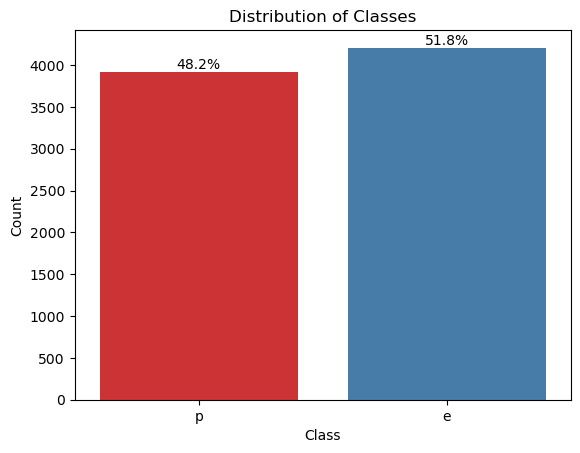

<Figure size 800x600 with 0 Axes>

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

#target column class: Indicates whether the mushroom is edible ('e') or poisonous ('p')
x = df['class']

# Create a count plot using Seaborn
ax = sns.countplot(x=x, data=df, palette='Set1')

# Add labels and title to the plot
ax.set(xlabel='Class', ylabel='Count', title='Distribution of Classes')

# Add percentage on top of each bar
total = len(x)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x_position = p.get_x() + p.get_width() / 2
    y_position = p.get_height()
    ax.annotate(percentage, (x_position, y_position), ha='center', va='bottom')

plt.figure(figsize=(8, 6))

# Show the plot
plt.show()

For now, let’s see if our data set is unbalanced. An unbalanced data set is when one class is much more present than the other.
In our data, we want to see if there is an equal number of poisonous and edible mushrooms in the data set. **The dataset is balanced.**

## 3. Data Preprocessing

In the data preprocessing section of the project, several steps we are taken to prepare the mushroom dataset for logistic regression analysis. First, the dataset was loaded into Python for processing. The primary focus was to ensure that the data was ‘tidy’ and formatted correctly for analysis. This involved converting categorical variables into a suitable numeric format with labelEncoder(), as logistic regression, work better with numerical input.

In this transformation, each category within the variable was assigned a unique numeric identifier (0/1). This step is important to obtain the categorical information in a form that the logistic regression model can use effectively. In addition, the data set was checked for missing values.

In [11]:
df = df.astype('category')

In [12]:
df.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [13]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [14]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


####  The column "veil-type" is 0 and not contributing to the data so we remove it.

In [15]:
df['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int64

In [16]:
df=df.drop(["veil-type"],axis=1)

### Quick look at the characteristics of the data

The violin plot below represents the distribution of the classification characteristics. It is possible to see that "gill-color" property of the mushroom breaks to two parts, one below 3 and one above 3, that may contribute to the classification.

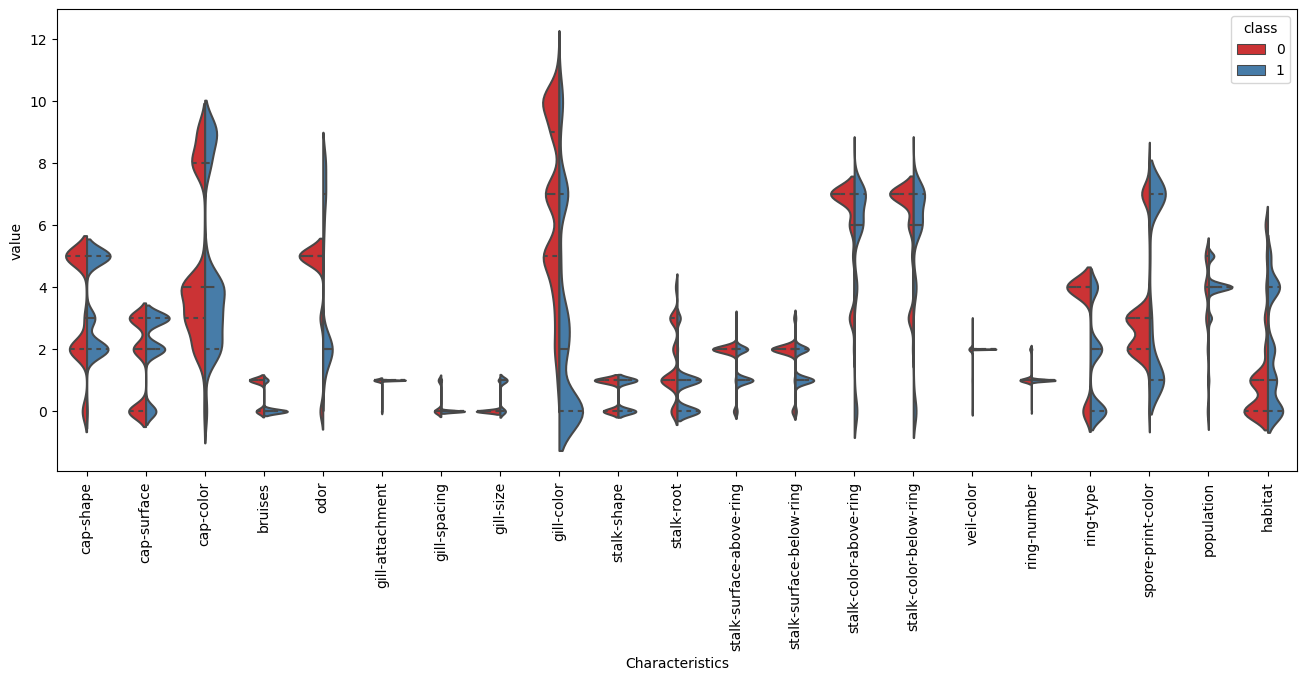

In [17]:
df_div = pd.melt(df, "class", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(16,6))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));
#plt.savefig("violinplot.png", format='png', dpi=900, bbox_inches='tight')

### Let's look at the correlation between the variables

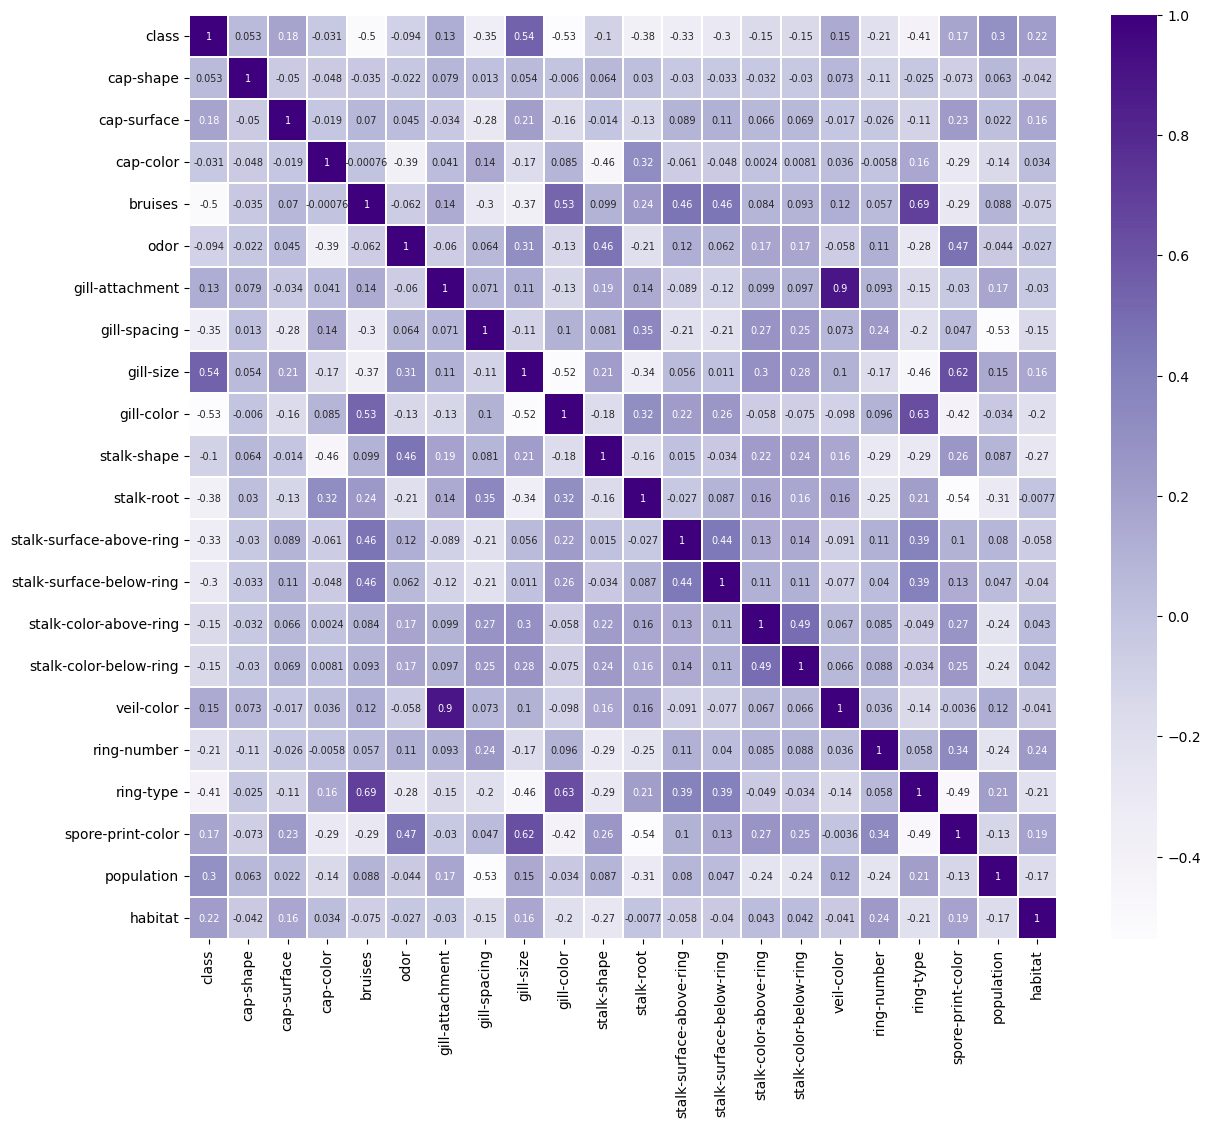

In [18]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Purples", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);
#plt.savefig("corr.png", format='png', dpi=900, bbox_inches='tight')

#### Usually, the least correlating variable is the most important one for classification. In this case, "gill-color" has -0.53 so let's look at it closely.

In [20]:
df[['class', 'gill-color']].groupby(['gill-color'], as_index=False).mean().sort_values(by='class', ascending=False)

,gill-color,class
0,0,1.000000
8,8,1.000000
3,3,0.721311
2,2,0.670213
7,7,0.428954
11,11,0.255814
10,10,0.204659
4,4,0.156863
5,5,0.106870
9,9,0.097561


#### Let's look closely at the feature "gill-color".

/Users/moritzrichter/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


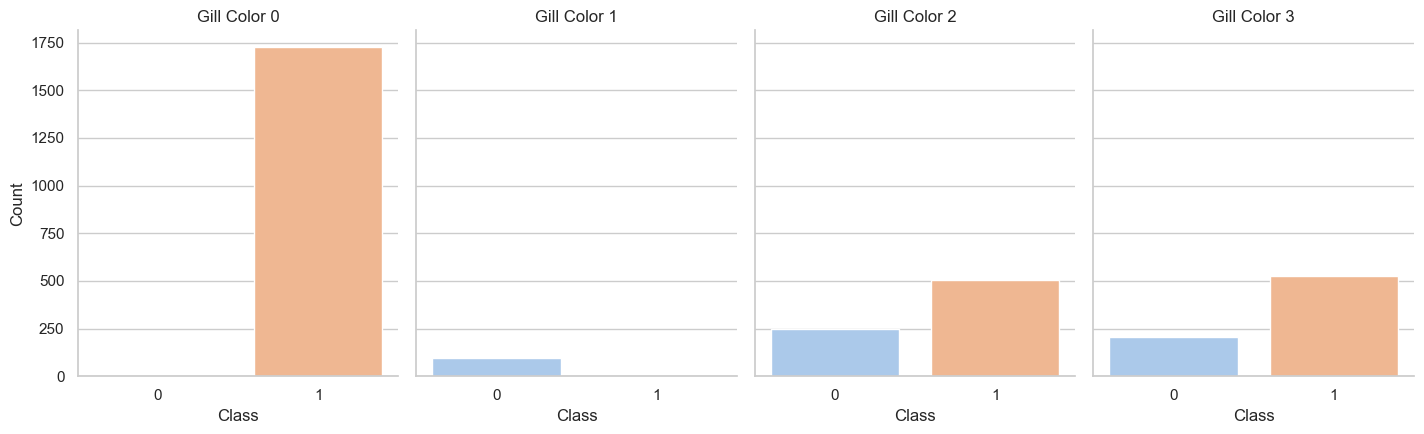

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns from the DataFrame
selected_columns = ['class', 'gill-color']
new_var = df[selected_columns]

# Filter the DataFrame based on the condition
new_var = new_var[new_var['gill-color'] <= 3.5]

# Set a custom color palette for better visibility
custom_palette = sns.color_palette("pastel")

# Use catplot with custom parameters for better layout and appearance
sns.set(style="whitegrid")
g = sns.catplot(x='class', col='gill-color', data=new_var, kind='count', 
                col_wrap=4, palette=custom_palette, height=4.5, aspect=.8)

# Set axis labels and titles
g.set_axis_labels("Class", "Count")
g.set_titles("Gill Color {col_name}")

# Save the plot to a file (uncomment the line if you want to save it)
#plt.savefig("gillcolor1.png", format='png', dpi=900, bbox_inches='tight')

# Show the plot
plt.show()

/Users/moritzrichter/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


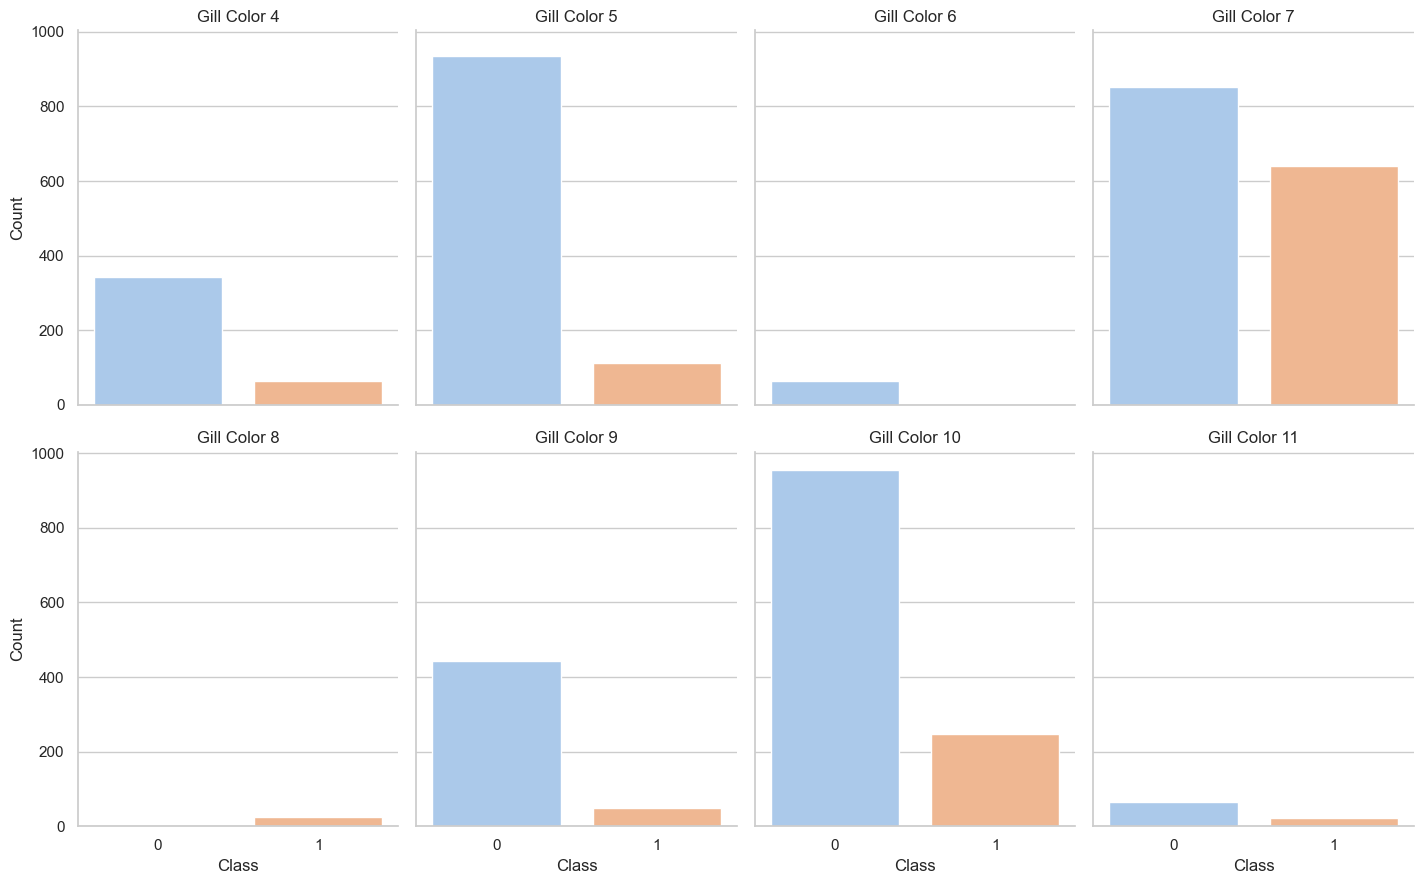

In [22]:
# Select relevant columns from the DataFrame
selected_columns = ['class', 'gill-color']
new_var = df[selected_columns]

# Filter the DataFrame based on the condition
new_var = new_var[new_var['gill-color'] > 3.5]

# Set a custom color palette for better visibility
custom_palette = sns.color_palette("pastel")

# Use catplot with custom parameters for better layout and appearance
sns.set(style="whitegrid")
g = sns.catplot(x='class', col='gill-color', data=new_var, kind='count', 
                col_wrap=4, palette=custom_palette, height=4.5, aspect=.8)

# Set axis labels and titles
g.set_axis_labels("Class", "Count")
g.set_titles("Gill Color {col_name}")

plt.show()

# Preparing the Data

##### Setting X and y axis and splitting the data into train and test respectively.

In [24]:
X = df.drop(['class'], axis=1)  
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)   

# Classification Methods

## 1. Logistic Regression 

In [25]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver="lbfgs", max_iter=500)
lr.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(lr.score(X_test, y_test)*100,2)))

Test Accuracy: 94.77%


In [26]:
# Predict probabilities on the test data
y_prob_lr = lr.predict_proba(X_test)[:, 1]

#### Classification report of Logistic Regression Classifier

In [27]:
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Classifier report: \n\n", classification_report(y_test, y_pred_lr))

Logistic Regression Classifier report: 

               precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



### Confusion Matrix for Logistic Regression Classifier

In [30]:
# Compute the confusion matrix based on predicted and true class labels
log_confusion_matrix = confusion_matrix(y_test, y_pred_lr)
log_confusion_matrix

array([[799,  44],
       [ 41, 741]])

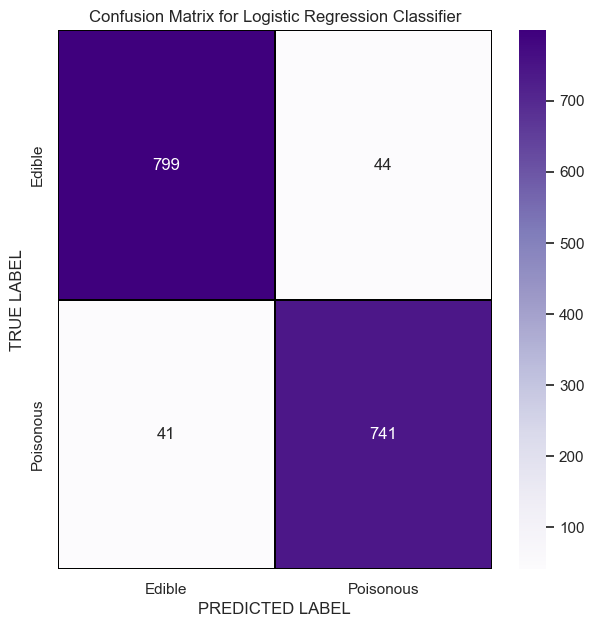

In [31]:
cm = confusion_matrix(y_test, y_pred_lr)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
#plt.savefig("lrcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

In [185]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_lr)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9834143673270938

In [32]:
def plot_roc(roc_auc):
    plt.figure(figsize=(5,5))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis('tight')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')

## 2. Linear Discriminant Analysis (LDA)

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Print test accuracy
print("Test Accuracy: {:.2%}".format(lda.score(X_test, y_test)))

Test Accuracy: 94.52%


In [36]:
# Predict class labels on the test data
y_pred_lda = lda.predict(X_test)

# Predict probabilities on the test data
y_prob_lda = lda.predict_proba(X_test)[:, 1]

#### Classification report of Linear Discriminant Classifier

In [42]:
# Predictions on the test set
y_pred_lda = lda.predict(X_test)

# Classification report
print("Linear Discriminant Analysis Classifier report: \n\n", classification_report(y_test, y_pred_lda))

Linear Discriminant Analysis Classifier report: 

               precision    recall  f1-score   support

           0       0.94      0.95      0.95       843
           1       0.95      0.94      0.94       782

    accuracy                           0.95      1625
   macro avg       0.95      0.94      0.95      1625
weighted avg       0.95      0.95      0.95      1625



### Confusion Matrix for Linear Discriminant Classifier

In [40]:
lda_confusion_matrix = confusion_matrix(y_test, y_pred_lda)
lda_confusion_matrix

array([[802,  41],
       [ 48, 734]])

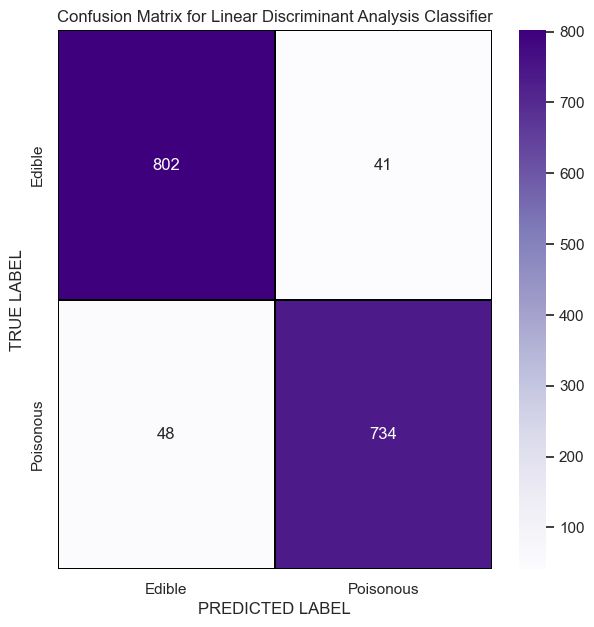

In [41]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_lda)

# Define labels for the confusion matrix
class_labels = ["Edible", "Poisonous"]

# Plotting the confusion matrix heatmap
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black", fmt=".0f", ax=ax, cmap="Purples", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Linear Discriminant Analysis Classifier')
plt.show()

In [43]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_lda)
roc_auc_lda = auc(false_positive_rate, true_positive_rate)
roc_auc_lda

0.9567856850306268

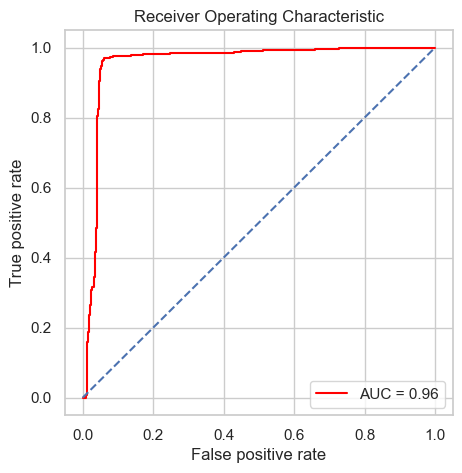

In [45]:
plot_roc(roc_auc_lda)

## 3. Quadratic Discriminant Analysis (QDA)

In [46]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, and y_test are already defined
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

# Predictions on the test set
y_pred_qda = qda.predict(X_test)

# Predict probabilities on the test data
y_prob_qda = qda.predict_proba(X_test)[:, 1]

# Print test accuracy
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print("Test Accuracy: {:.2%}".format(accuracy_qda))

Test Accuracy: 99.45%


#### Classification report of Quadratic Discriminant Classifier

In [47]:
# Predictions on the test set
y_pred_qda = qda.predict(X_test)

# Classification report
print("Linear Quadratic Analysis Classifier report: \n\n", classification_report(y_test, y_pred_qda))

Linear Quadratic Analysis Classifier report: 

               precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



### Confusion Matrix for Quadratic Discriminant Classifier

In [48]:
qda_confusion_matrix = confusion_matrix(y_test, y_pred_qda)
qda_confusion_matrix

array([[843,   0],
       [  9, 773]])

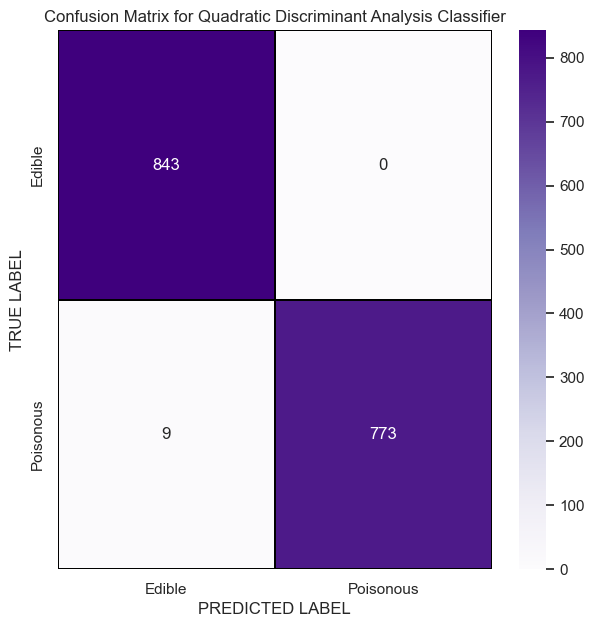

In [49]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_qda)

# Define labels for the confusion matrix
class_labels = ["Edible", "Poisonous"]

# Plotting the confusion matrix heatmap
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(cm, annot=True, linewidths=0.2, linecolor="black", fmt=".0f", ax=ax, cmap="Purples", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Quadratic Discriminant Analysis Classifier')
plt.show()

In [50]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_qda)
roc_auc_qda = auc(false_positive_rate, true_positive_rate)
roc_auc_qda

0.9983298595625779

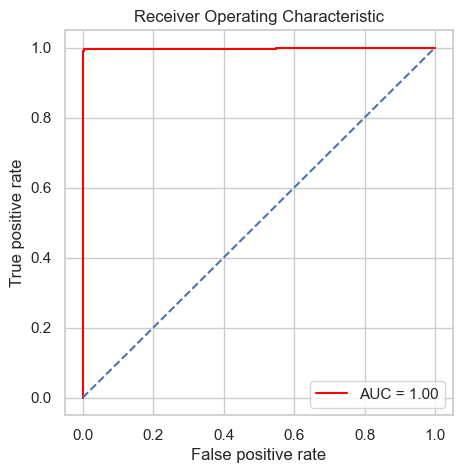

In [51]:
plot_roc(roc_auc_qda)

## 4. KNN Classification

In [52]:
print(X_train.shape, X_test.shape)

(6499, 21) (1625, 21)


In [53]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

best_Kvalue = 0
best_score = 0

# Ensure X_train, X_test, and y_train are NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).ravel()

for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    
    # Use accuracy on the test set for comparison
    current_score = knn.score(X_test, y_test)
    
    if current_score > best_score:
        best_score = current_score
        best_Kvalue = i

print("Best KNN Value: {}".format(best_Kvalue))
print("Test Accuracy: {:.2%}".format(best_score))

Best KNN Value: 1
Test Accuracy: 99.94%


#### Classification report of KNN Classifier

In [54]:
y_prob_knn = knn.predict_proba(X_test)[:, 1]
y_pred_knn = knn.predict(X_test)
print("KNN Classifier report: \n\n", classification_report(y_test, y_pred_knn))

KNN Classifier report: 

               precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      0.99       782

    accuracy                           1.00      1625
   macro avg       0.99      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### Confusion Matrix for KNN Classifier

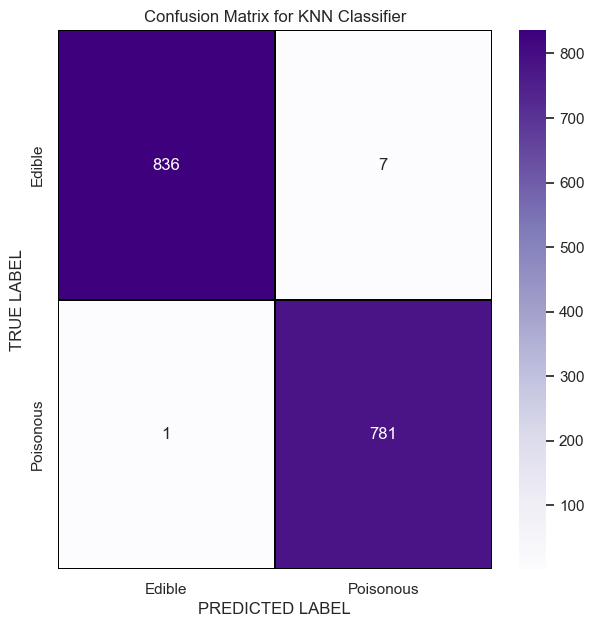

In [55]:
cm = confusion_matrix(y_test, y_pred_knn)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNN Classifier')
#plt.savefig("knncm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

In [56]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(false_positive_rate, true_positive_rate)
roc_auc_knn

0.9999423566424868

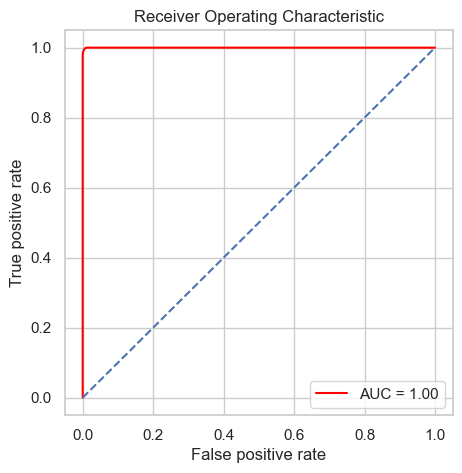

In [57]:
plot_roc(roc_auc_knn)

## 5. Naive Bayes Classification

In [60]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

print("Test Accuracy: {}%".format(round(nb.score(X_test, y_test)*100, 2)))

Test Accuracy: 92.18%


#### Classification report of Naive Bayes Classifier

In [59]:
y_prob_nb = nb.predict_proba(X_test)[:, 1]
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Classifier report: \n\n", classification_report(y_test, y_pred_nb))

Naive Bayes Classifier report: 

               precision    recall  f1-score   support

           0       0.93      0.91      0.92       843
           1       0.91      0.93      0.92       782

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



### Confusion Matrix for Naive Bayes Classifier

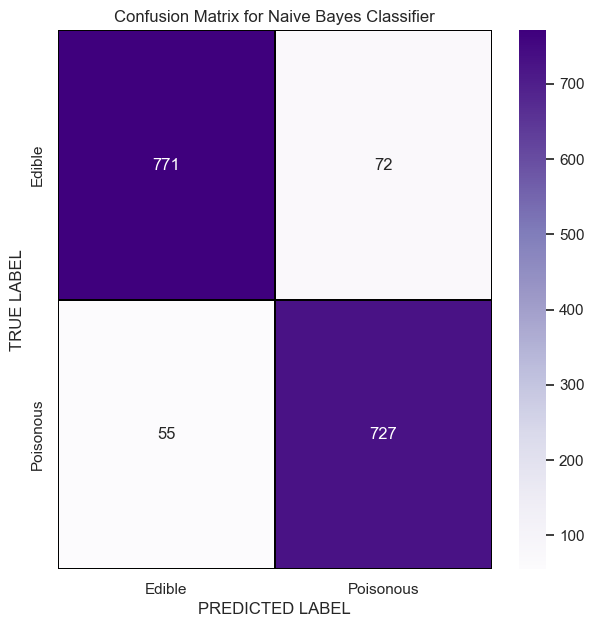

In [61]:
cm = confusion_matrix(y_test, y_pred_nb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
#plt.savefig("nbcm.png", format='png', dpi=900, bbox_inches='tight')
plt.show()

In [62]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(false_positive_rate, true_positive_rate)
roc_auc_nb

0.9544814676605595

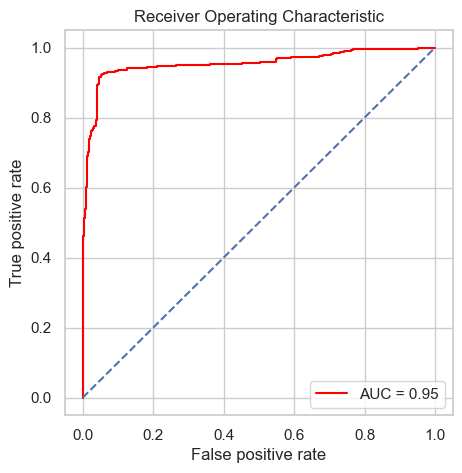

In [63]:
plot_roc(roc_auc_nb)

### SUMMARY

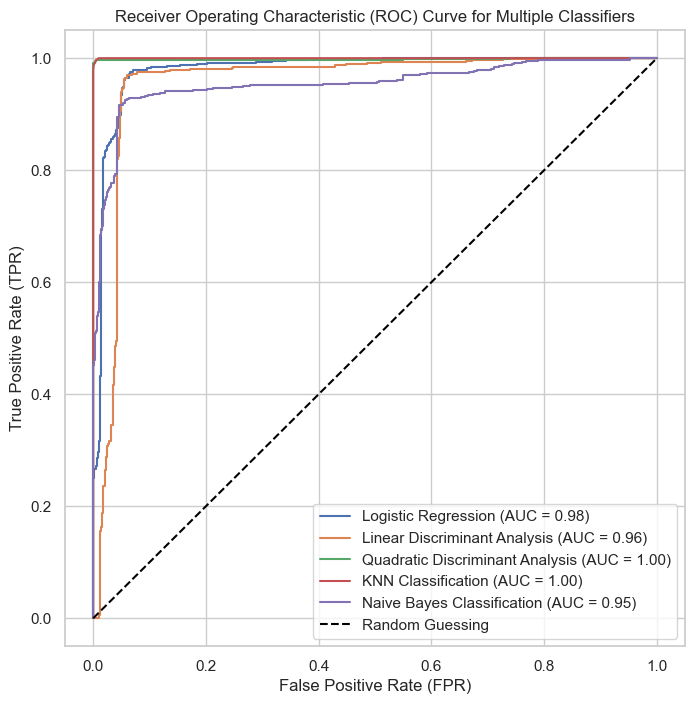

In [64]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC metrics for Logistic Regression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

# Compute ROC metrics for Linear Discriminant Analysis
fpr_lda, tpr_lda, thresholds_lda = roc_curve(y_test, y_prob_lda)
roc_auc_lda = auc(fpr_lda, tpr_lda)

# Compute ROC metrics for Quadratic Discriminant Analysis
fpr_qda, tpr_qda, thresholds_qda = roc_curve(y_test, y_prob_qda)
roc_auc_qda = auc(fpr_qda, tpr_qda)

# Compute ROC metrics for KNN Classification
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Compute ROC metrics for Naive Bayes Classification
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# Define a function to plot ROC curve
def plot_roc(ax, fpr, tpr, roc_auc, label):
    ax.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Initialize a figure and axis
plt.figure(figsize=(8, 8))
ax = plt.gca()

# Plot ROC curves for each classifier
plot_roc(ax, fpr_lr, tpr_lr, roc_auc_lr, 'Logistic Regression')
plot_roc(ax, fpr_lda, tpr_lda, roc_auc_lda, 'Linear Discriminant Analysis')
plot_roc(ax, fpr_qda, tpr_qda, roc_auc_qda, 'Quadratic Discriminant Analysis')
plot_roc(ax, fpr_knn, tpr_knn, roc_auc_knn, 'KNN Classification')
plot_roc(ax, fpr_nb, tpr_nb, roc_auc_nb, 'Naive Bayes Classification')

# Plot the random guessing line
ax.plot([0, 1], [0, 1], linestyle='--', color='black', label='Random Guessing')

# Set labels and title
ax.set_xlabel('False Positive Rate (FPR)')
ax.set_ylabel('True Positive Rate (TPR)')
ax.set_title('Receiver Operating Characteristic (ROC) Curve for Multiple Classifiers')

# Display the legend
ax.legend(loc='lower right')

# Show the plot
plt.show()

In [65]:
from sklearn.metrics import classification_report

# Create classification reports for each classifier
report_lr = classification_report(y_test, y_pred_lr)
report_lda = classification_report(y_test, y_pred_lda)
report_qda = classification_report(y_test, y_pred_qda)
report_knn = classification_report(y_test, y_pred_knn)
report_nb = classification_report(y_test, y_pred_nb)

# Display the classification reports
print("Classification Report for Logistic Regression:\n", report_lr)
print("\nClassification Report for Linear Discriminant Analysis:\n", report_lda)
print("\nClassification Report for Quadratic Discriminant Analysis:\n", report_qda)
print("\nClassification Report for KNN Classification:\n", report_knn)
print("\nClassification Report for Naive Bayes Classification:\n", report_nb)

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.94      0.95      0.95       782

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625


Classification Report for Linear Discriminant Analysis:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       843
           1       0.95      0.94      0.94       782

    accuracy                           0.95      1625
   macro avg       0.95      0.94      0.95      1625
weighted avg       0.95      0.95      0.95      1625


Classification Report for Quadratic Discriminant Analysis:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       843
           1       1.00      0.99      0.99       782

    accuracy   